In [1]:
# 분류기
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVN
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier


# 앙상블
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# 전처리
from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score

# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

# pandas, numpy, seaborn, 시각화
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측값 시각화
import missingno as ms
%matplotlib inline

# 경고문구
import warnings
warnings.filterwarnings('ignore')

# datasets

1. 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
- features.txt, sep='\s+'

In [2]:
human = pd.read_csv('../data/human_activity/features.txt', sep='\s+', header=None)
human

,0
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


In [3]:
print(human.info())
print(human.count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       561 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB
None
<bound method DataFrame.count of                                    0
0                    tBodyAcc-Mean-1
1                    tBodyAcc-Mean-2
2                    tBodyAcc-Mean-3
3                     tBodyAcc-STD-1
4                     tBodyAcc-STD-2
..                               ...
556      tBodyGyro-AngleWRTGravity-1
557  tBodyGyroJerk-AngleWRTGravity-1
558      tXAxisAcc-AngleWRTGravity-1
559      tYAxisAcc-AngleWRTGravity-1
560      tZAxisAcc-AngleWRTGravity-1

[561 rows x 1 columns]>


2. 데이터프레임에 피처명을 컬럼으로 뷰여하기 위해 리스트 객체로 다시 반환

In [4]:
list(human[0].tolist())

['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3',
 'tGravityAcc-Mean-1',
 'tGravityAcc-Mean-2',
 'tGravityAcc-Mean-3',
 'tGravityAcc-STD-1',
 'tGravityAcc-STD-2',
 'tGravityAcc-STD-3',
 'tGravityAcc-M

3. 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
- 컬럼명은 feature_name 적용 

In [5]:
X_test = pd.read_csv('../data/human_activity/Test/X_test.txt', sep='\s+', header=None)
y_test = pd.read_csv('../data/human_activity/Test/y_test.txt', sep='\s+', header=None)
X_test.columns = list(human[0].tolist())
y_test.columns = ['target']

display(X_test.head())
display(y_test.head())

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


,target
0,5
1,5
2,5
3,5
4,5


4. 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 target으로 부여

In [6]:
X_train = pd.read_csv('../data/human_activity/Train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('../data/human_activity/Train/y_train.txt', sep='\s+', header=None)
X_train.columns = list(human[0].tolist())
y_train.columns = ['target']

display(X_train.head())
display(y_train.head())

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


,target
0,5
1,5
2,5
3,5
4,5


5. 파일 로딩이 끝나면 X_train, X_test, y_train, y_test 의 shape  및 데이터 확인

In [7]:
# shape 확인
print('X_train : {}, X_test : {}, y_train : {}, y_test : {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (7767, 561), X_test : (3162, 561), y_train : (7767, 1), y_test : (3162, 1)


In [8]:
# target 분포
y_train['target'].value_counts()

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: target, dtype: int64

In [9]:
# 결측값 확인
X_train.isna().sum()

tBodyAcc-Mean-1                    0
tBodyAcc-Mean-2                    0
tBodyAcc-Mean-3                    0
tBodyAcc-STD-1                     0
tBodyAcc-STD-2                     0
                                  ..
tBodyGyro-AngleWRTGravity-1        0
tBodyGyroJerk-AngleWRTGravity-1    0
tXAxisAcc-AngleWRTGravity-1        0
tYAxisAcc-AngleWRTGravity-1        0
tZAxisAcc-AngleWRTGravity-1        0
Length: 561, dtype: int64

6. Decision Tree Tunning

In [10]:
# Decision Tree 모델 만들기
tree_model = DecisionTreeClassifier(random_state=100)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('tree 분류 정확도 : ', acc)
print('tree 분류 하이퍼 파라미터 : ', tree_model.get_params()) # tree 튜닝할때 사용할수 있는 결정 값

tree 분류 정확도 :  0.8020240354206198
tree 분류 하이퍼 파라미터 :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 100, 'splitter': 'best'}


In [11]:
# param setting
params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(tree_model, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print("Grid Search CV's best score : ", grid_cv.best_score_)
print('최적의 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.5min finished


Grid Search CV's best score :  0.8433136015235178
최적의 하이퍼 파라미터 :  {'max_depth': 10}


In [12]:
# Grid Search CV의 결과
grid_cv_df = pd.DataFrame(grid_cv.cv_results_)
grid_cv_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.821426
1,8,0.842030
2,10,0.843314
3,12,0.840353
4,16,0.836362
5,20,0.840354
6,24,0.840354


In [13]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9108


In [14]:
params = {
    'n_estimators':[10],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )

grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8861


In [15]:
# 튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가
rf_clf1 = RandomForestClassifier(n_estimators=10, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=10, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8918


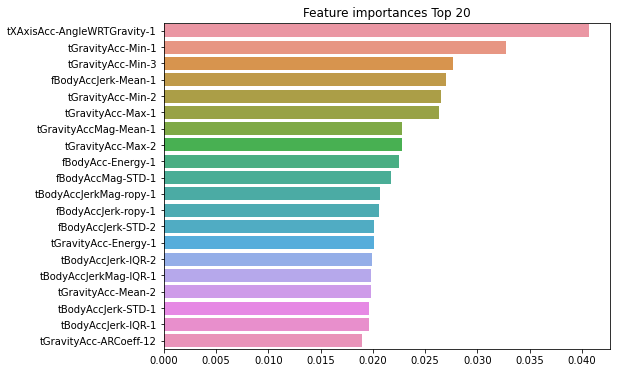

In [16]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))

sns.barplot(x=ftr_top20 , y = ftr_top20.index)

plt.title('Feature importances Top 20')

plt.show()
plt.close()